# 量子电路模拟器

## 背景知识
1. qubit = 量子比特
2. 单个qubit的状态由2*2的复数矩阵表示，n个qubit对应的总状态是边长为2**n的复数矩阵（指数增长）
3. 对于给定的qubit序列，我们有大小端两种表示。
   1. 小端：[qubit_number, .... 0], 如对于11110, 0号比特的值是0 (qiskit)
   2. 大端：[0, .... qubit_number], 如对于01111, 0号比特的值是0 (各类教科书)

In [1]:
# 实现所需的包
from circuit import Circuit, CNOT, U3  #
from library import paresGateMatrixPd
from qiskit.quantum_info import Operator
import time
from numpy import pi
import numpy as np

## 量子电路

In [2]:
qubit_numer = 3
qc = Circuit(qubit_numer) # 有两个比特[0,1]

### 电路提供了两种门 CNOT门 和 U3 门。

1. U3门(U门)是单比特门, 除了作用的比特，有三个参数 theta、lambda、phi。
2. CNOT(CX)门是两比特门， 除了连接的两个比特，没有参数


如果需要，通过查看qiskit官方文档来了解更多详细解释：
https://docs.quantum.ibm.com/api/qiskit/1.2/qiskit.circuit.library.U3Gate
https://docs.quantum.ibm.com/api/qiskit/1.2/qiskit.circuit.library.CXGate


In [3]:
u3 = U3(0, pi/2, pi/3, pi/4)  # 参数：作用的比特位置，theta、lambda、phi
qc.addGate(u3)  # 将其加入电路中
u3.matrix()  # 一个u3门对应一个2X2的矩阵

array([[ 0.70710678+0.j        , -0.35355339-0.61237244j],
       [ 0.5       +0.5j       , -0.1830127 +0.6830127j ]])

In [4]:
cnot = CNOT(0,1) # 参数：作用的比特位置 （控制位，目标位）
qc.addGate(cnot) 
cnot.matrix()  # 一个cnot门对应一个4X4的矩阵

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

In [5]:
paresGateMatrixPd(cnot.matrix())  # CNOT门来说，控制位 = 1 则目标位翻转（注意是大端，和qiskit直接得到的结果顺序不同，这在文档中也有记载）

,00,01,10,11
00,1.0,,,
01,,1.0,,
10,,,,1.0
11,,,1.0,


In [6]:
qiskit_qc = qc.toQiskit()
print(qiskit_qc)

     ┌────────────────┐     
q_0: ┤ U(π/2,π/4,π/3) ├──■──
     └────────────────┘┌─┴─┐
q_1: ──────────────────┤ X ├
                       └───┘
q_2: ───────────────────────
                            


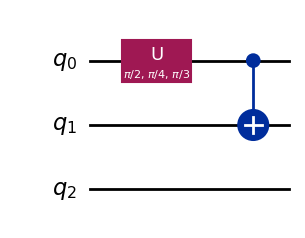

In [7]:
# 也可以画的更好看些
qiskit_qc.draw('mpl')

Circuit.random(gate_number) 用于生成一个随机的电路

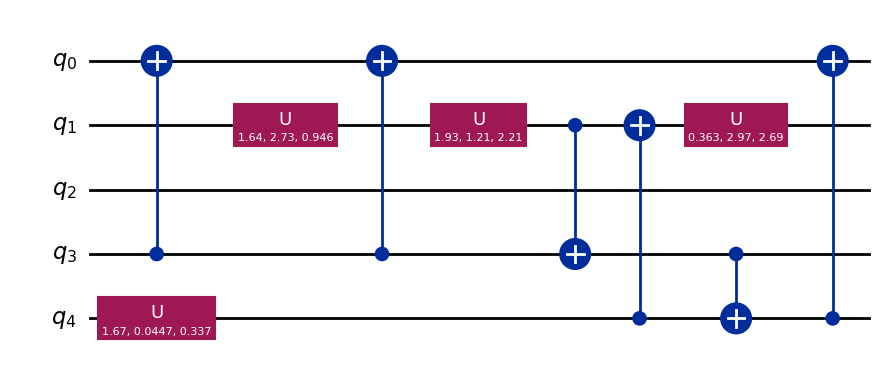

In [8]:
random_qubit_number = 5
random_qc = Circuit(random_qubit_number)
random_qc.random(10)  #电路中门的数量
random_qc.toQiskit().draw('mpl')

## 得到电路所对应的矩阵

In [9]:
random_qc_matrix = random_qc.matrix()
random_qc_matrix


array([[ 0.16472587+0.38636558j, -0.03076956-0.46351047j,
         0.09146129+0.01919853j, ...,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        , ...,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.43073047+0.36181854j,  0.25949502+0.43744888j,
         0.0615485 +0.0591343j , ...,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       ...,
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        , ...,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        , ..., -0.07636447+0.01114519j,
        -0.51479987+0.22676528j, -0.50707063+0.0397311j ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j       

In [11]:
random_qc_matrix.shape  # (2**qubit_number, 2**qubit_number)

(32, 32)

和开源库对比验证下

In [12]:
verified_qc = random_qc.toQiskit() 
verified_qc_matrix = Operator(verified_qc.reverse_bits()).data  # qiskt是小端, 我们这里是大端，因此需要翻转比特顺序才能得到相同的矩阵结果
print(np.allclose(random_qc_matrix, verified_qc_matrix))

True


## **任务目标**

**__完善circuit.py，加快circuit.matrix()的效率，可以使用任何编程语言（python、matlab、C、R，CUDA等），可以使用多进程，分布式等任意方法__**

### 需要提交的材料
1. 可执行代码
2. 代码介绍，可以是word、pdf、markdown形式,需包含：
    1. 实现介绍
    2. 已有的加速实现方式 + future work（不需要实现）
    3. 测试结果，包含了测试的硬件、软件、电路的规模（比特数、门数量）、计算时间、baseline（本项目提供的代码）在同一台电脑上执行同一个电路计算的时长
3. 你需要准备向我们解释和介绍你的成果，时长约15分钟。


__请不要作弊，我们会根据你所描述的实现方式预测加速情况，如果测试不合理我们会要求进行一对一的验证__

## 建议与参考
1. 提高代码的并行度，利用并行计算相关的知识；
2. 减少重复计算；
3. 利用一下稀疏矩阵的计算方法进行加速；
4. __研究一下tensor product和permute函数，发现其中的规律（我们可以把它从两个(2**N, 2**N)的矩阵乘法变成一个(2**N, 2**N)和(2,2)的矩阵的乘法)__；
5. 改成蒙特卡洛采样的方法
6. 找到一个电路优化方法，减少需要优化的电路；
7. 互相之间不依赖的门可以并行的计算
8. ······

下面这格需要安装graphviz的二进制文件。请参考https://graphviz.org/download/ 完成安装

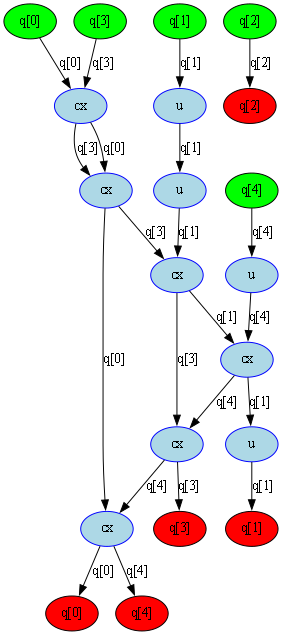

In [13]:
# 门依赖关系可视化示例
from qiskit.dagcircuit import DAGCircuit
from qiskit.converters import isinstanceint, isinstancelist, dag_to_circuit, circuit_to_dag
dag_circuit = circuit_to_dag(verified_qc)
dag_circuit.draw()
# 互相之间没有依赖的比特可以张量积成一个矩阵后一起计算